In [41]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset
missing_values = ["n/a", "na", "--", "NULL", "Not Available", "Unknown"]
df = pd.read_csv("Final_corrupted_dataset.csv", na_values=missing_values)

# Show missing values count per column
# df.isnull().sum()

#Show the counts of the values in each column
# for i in df.columns:
#   print(df[i].value_counts())
#   print()

In [42]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify duplicates are removed
df.duplicated().sum()


0

In [43]:
# Replace lowercase "high" and "low" with standard "High" and "Low"
df.replace({"high": "High", "low": "Low"}, inplace=True)


In [44]:
# Define categorical replacements
categorical_replacements = {
    "Parental_Involvement": ["Low", "Medium", "High"],
    "Access_to_Resources": ["Low", "Medium", "High"],
    "Extracurricular_Activities": ["Yes", "No"],
    "Motivation_Level": ["Low", "Medium", "High"],
    "Internet_Access": ["Yes"],
    "Family_Income": ["Low", "Medium"],
    "Teacher_Quality": ["Low", "Medium", "High"],
    "School_Type": ["Public"],
    "Peer_Influence": ["Positive", "Neutral", "Negative"],
    "Learning_Disabilities": ["No"],
    "Parental_Education_Level": ["High School", "College", "Post Graduate"],
    "Distance_from_Home": ["Near", "Moderate"],
    "Gender": ["Male", "Female"]
}

# Fill missing categorical values randomly
for col, choices in categorical_replacements.items():
    if col in df.columns:
        df[col].fillna(random.choice(choices), inplace=True)


<ipython-input-44-8b6826270baa>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(random.choice(choices), inplace=True)


In [45]:
# Define numeric columns
numeric_cols = ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores",
                "Tutoring_Sessions", "Physical_Activity", "Exam_Score"]

# Convert and fill missing values with mean
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col].fillna(df[col].mean(), inplace=True)


<ipython-input-45-58cda9bfd622>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [46]:
# # check if there is any NaN
# print(df.isnull().sum())

# print()

# #Show the counts of the values in each column
# for i in df.columns:
#   print(df[i].value_counts())

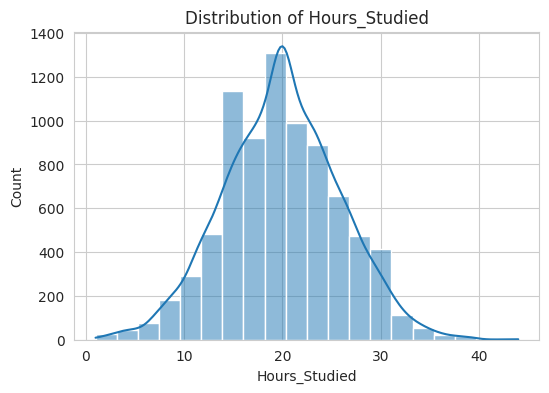

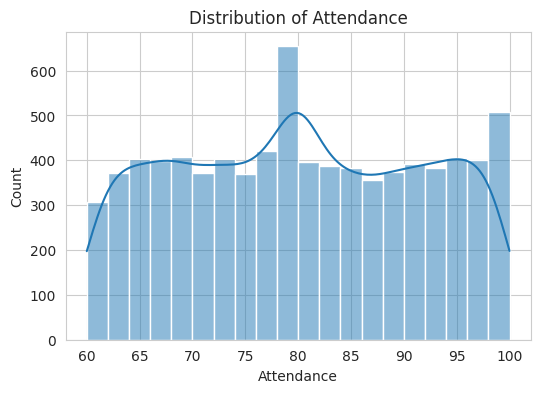

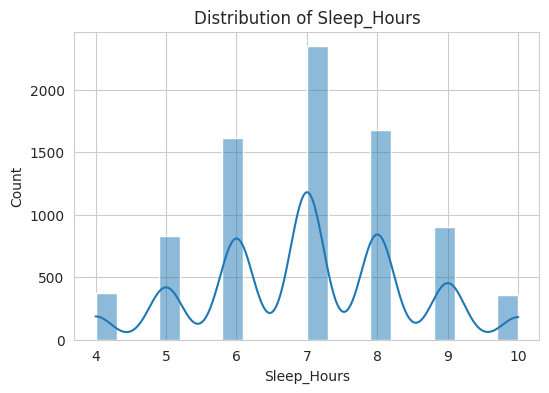

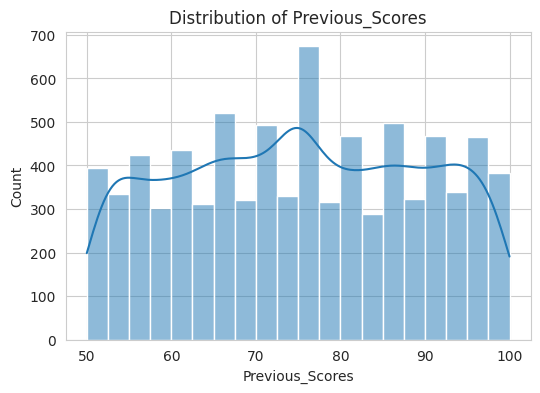

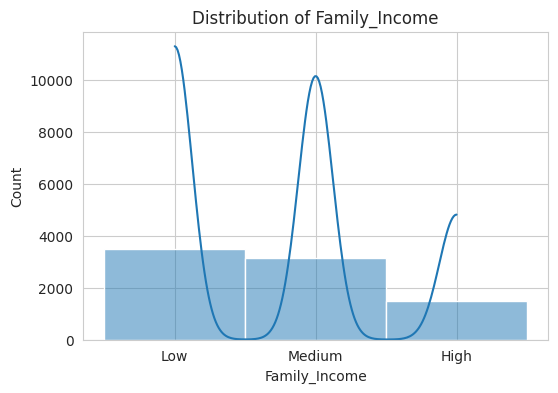

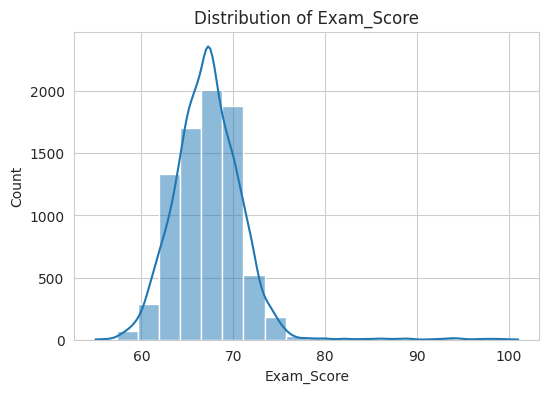

In [47]:
# Define numerical columns
numeric_cols = [
    "Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores",
    "Family_Income", "Exam_Score"
]

# Plot histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()


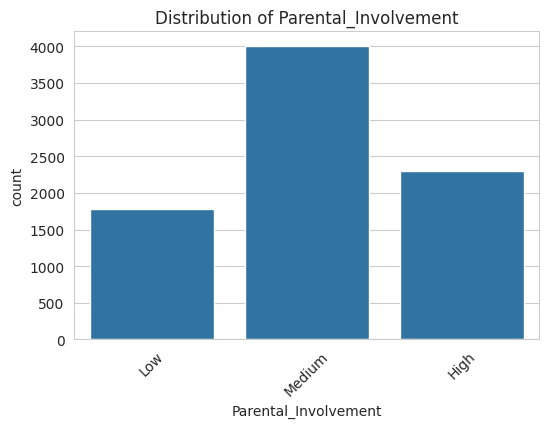

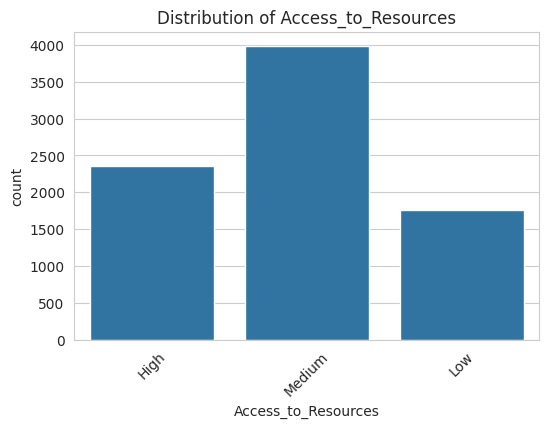

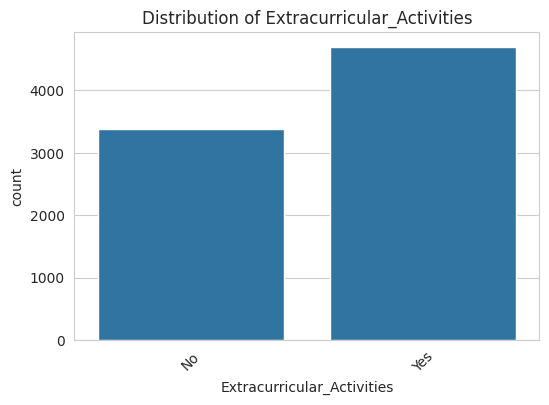

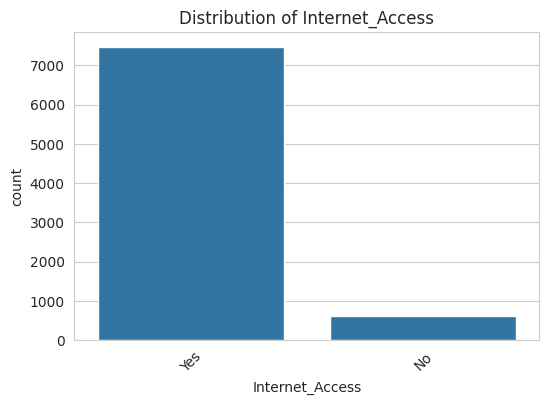

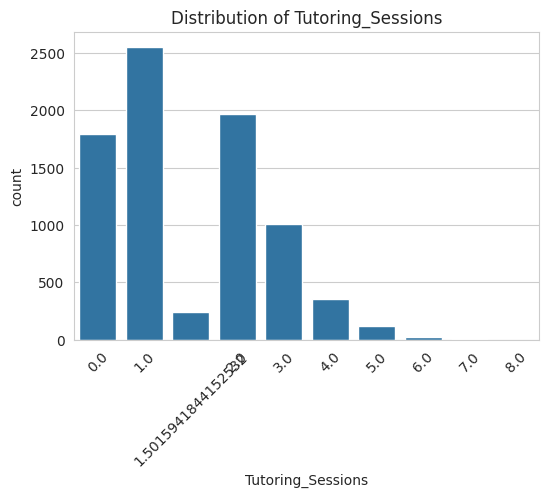

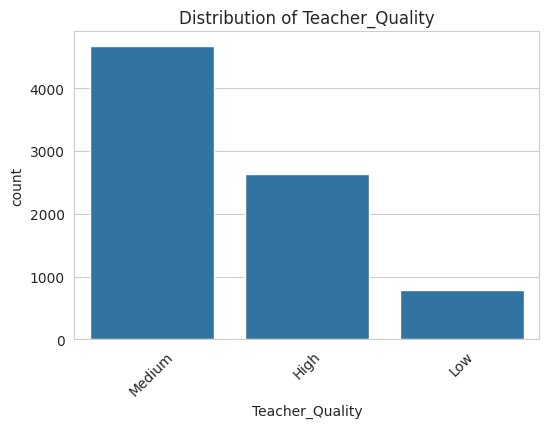

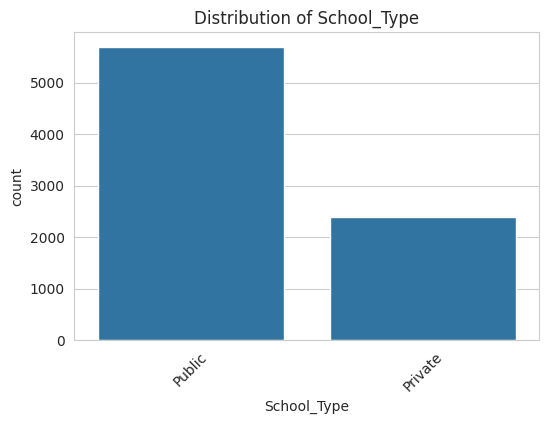

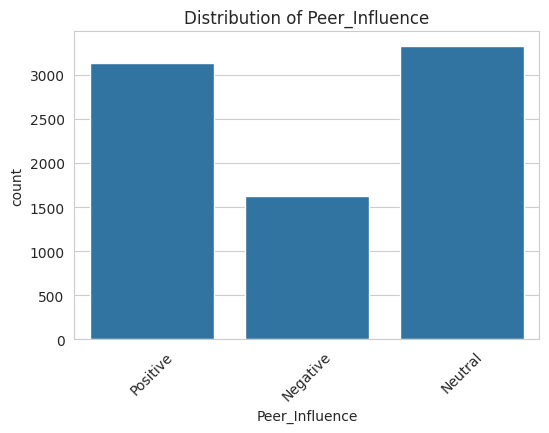

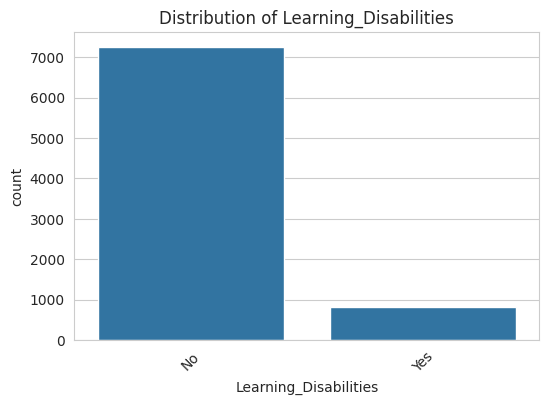

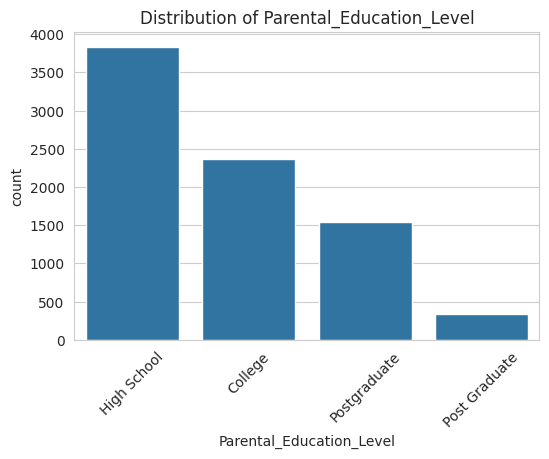

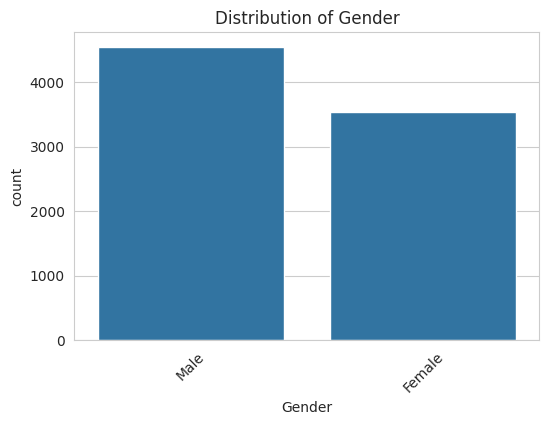

In [48]:
# Define categorical columns
categorical_cols = [
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Internet_Access", "Tutoring_Sessions", "Teacher_Quality", "School_Type",
    "Peer_Influence", "Learning_Disabilities", "Parental_Education_Level", "Gender"
]

# Plot count distributions
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


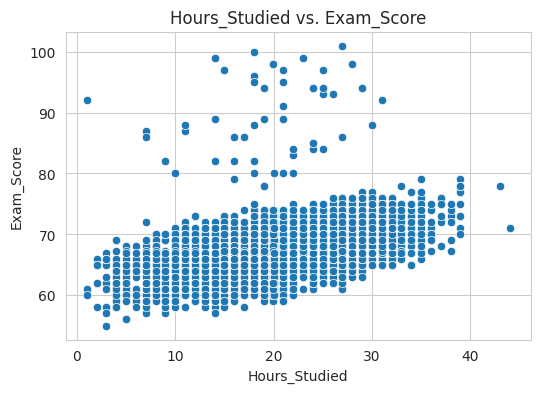

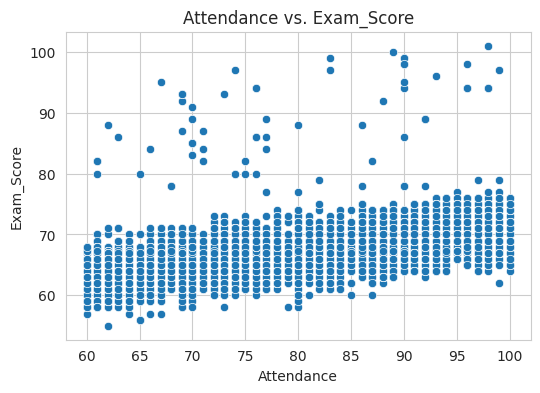

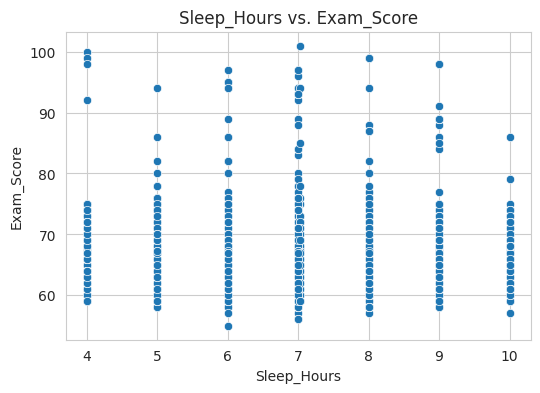

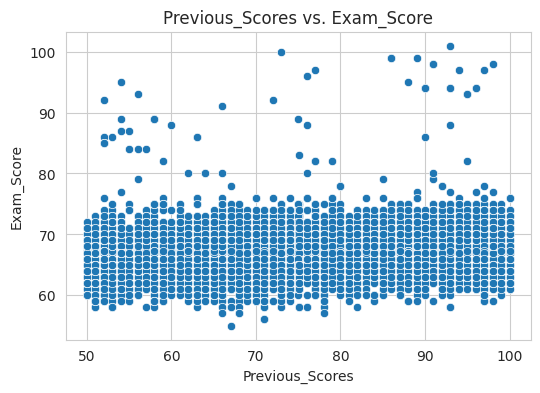

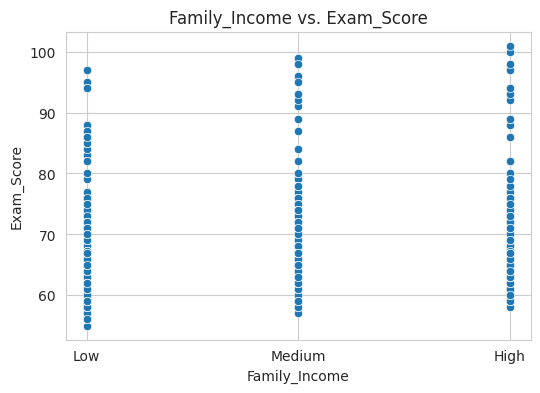

In [49]:
for col in numeric_cols:
    if col != "Exam_Score":  # Avoid Exam_Score vs. Exam_Score
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df["Exam_Score"])
        plt.title(f"{col} vs. Exam_Score")
        plt.show()


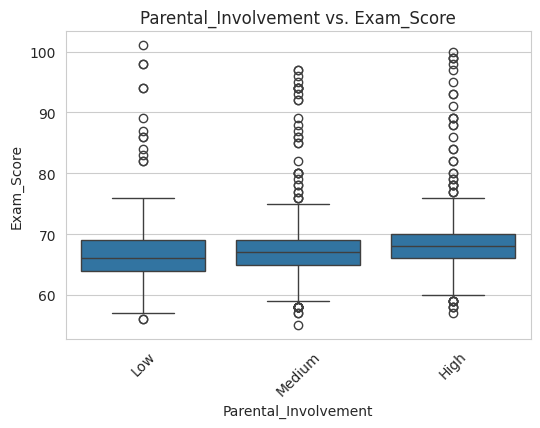

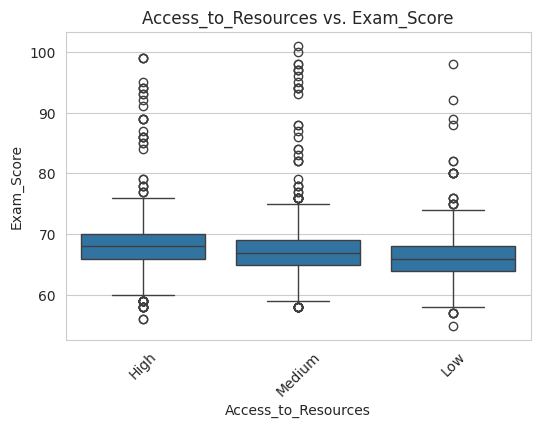

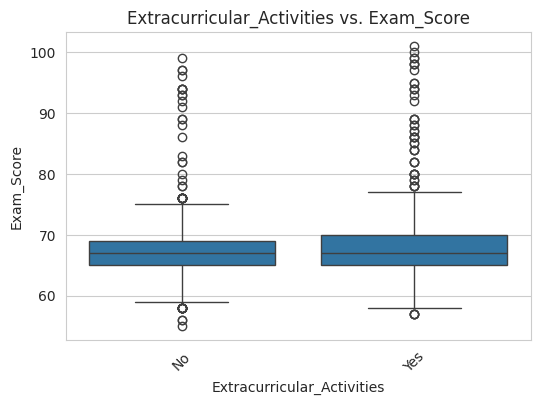

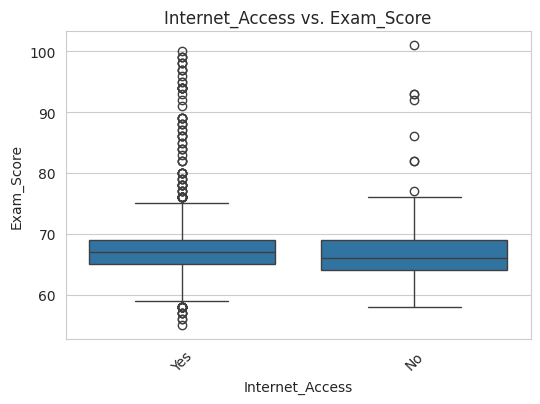

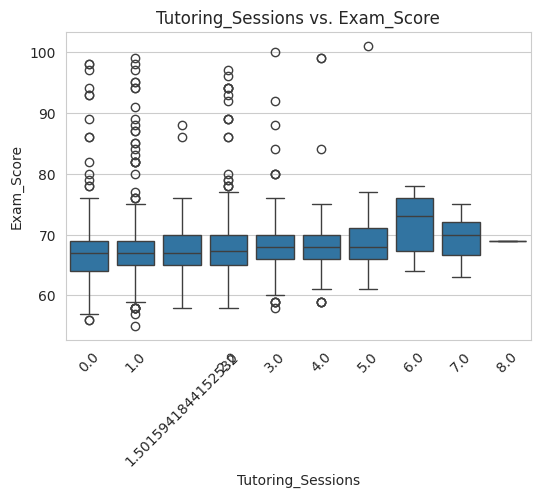

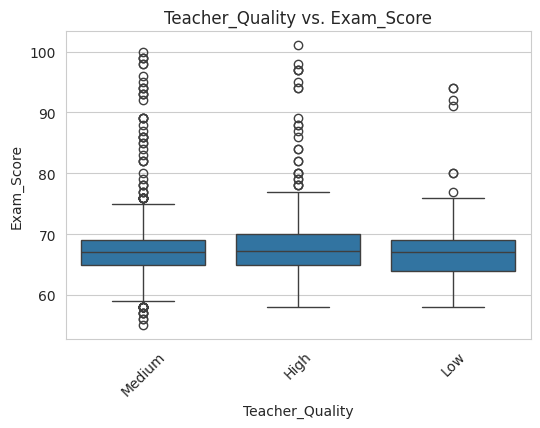

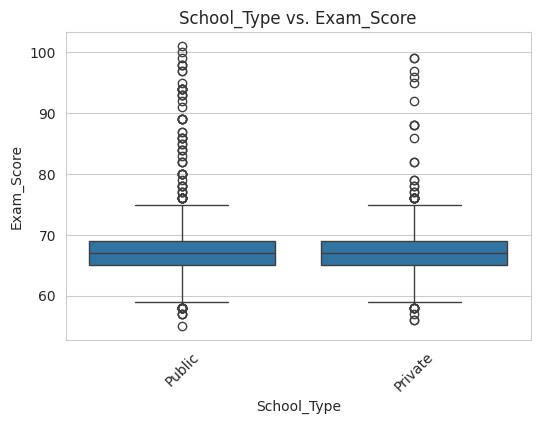

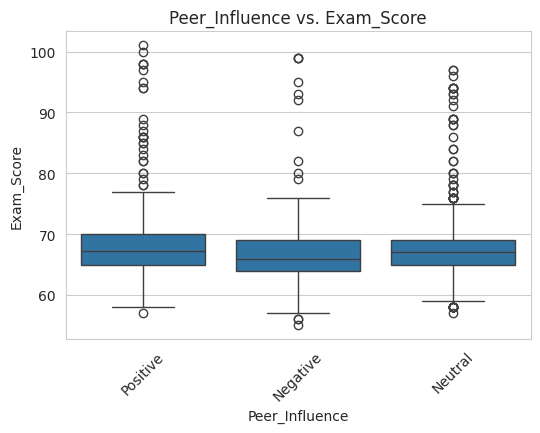

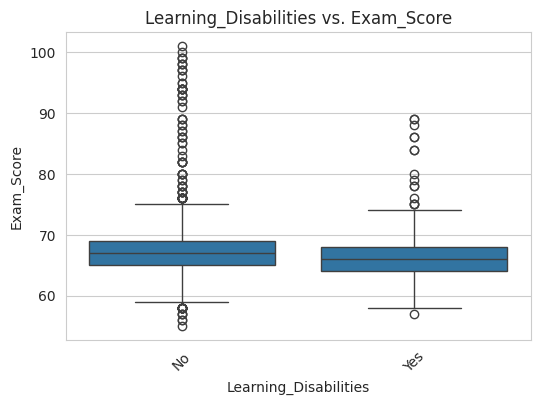

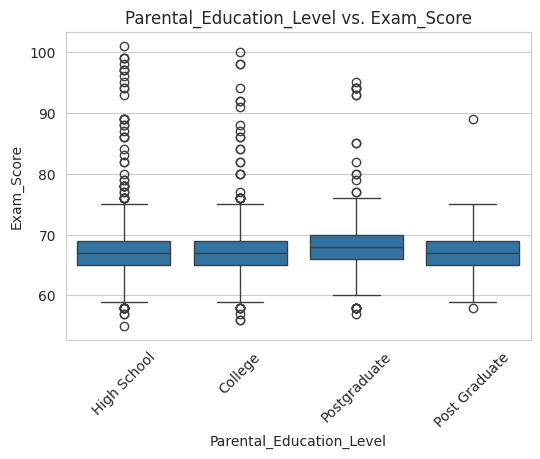

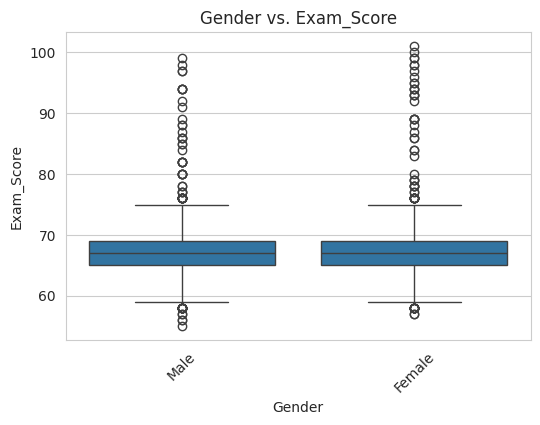

In [50]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], y=df["Exam_Score"])
    plt.title(f"{col} vs. Exam_Score")
    plt.xticks(rotation=45)
    plt.show()


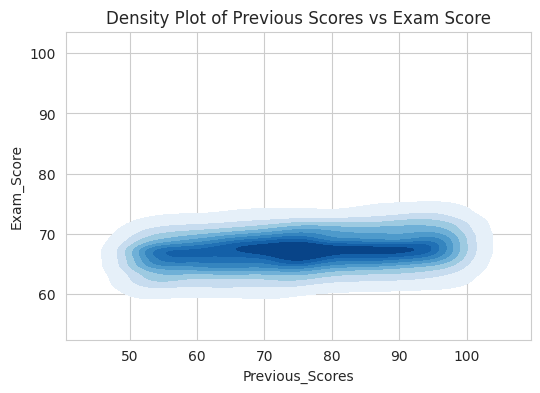

In [51]:
plt.figure(figsize=(6, 4))
sns.kdeplot(x=df["Previous_Scores"], y=df["Exam_Score"], cmap="Blues", fill=True)
plt.title("Density Plot of Previous Scores vs Exam Score")
plt.show()


In [55]:
#Replace all values with floats for training models
# Define mapping dictionary
mapping_dict = {
    "Parental_Involvement": {"Low": 0.33, "Medium": 0.66, "High": 0.99},
    "Access_to_Resources": {"Low": 0.33, "Medium": 0.66, "High": 0.99},
    "Extracurricular_Activities": {"Yes": 1, "No": 0},
    "Motivation_Level": {"Low": 0.33, "Medium": 0.66, "High": 0.99},
    "Internet_Access": {"Yes": 1, "No": 0},
    "Family_Income": {"Low": 0.33, "Medium": 0.66, "High": 0.99},
    "Teacher_Quality": {"Low": 0.33, "Medium": 0.66, "High": 0.99},
    "School_Type": {"Public": 1, "Private": 0},
    "Peer_Influence": {"Positive": 0.33, "Neutral": 0.66, "Negative": 0.99},
    "Learning_Disabilities": {"Yes": 1, "No": 0},
    "Parental_Education_Level": {"High School": 0.33, "College": 0.66, "Postgraduate": 0.99, "Post Graduate": 0.99},
    "Distance_from_Home": {"Near": 0.33, "Moderate": 0.66, "Far": 0.99},
    "Gender": {"Male": 1, "Female": 0}
}

# Apply mapping to dataframe
df.replace(mapping_dict, inplace=True)

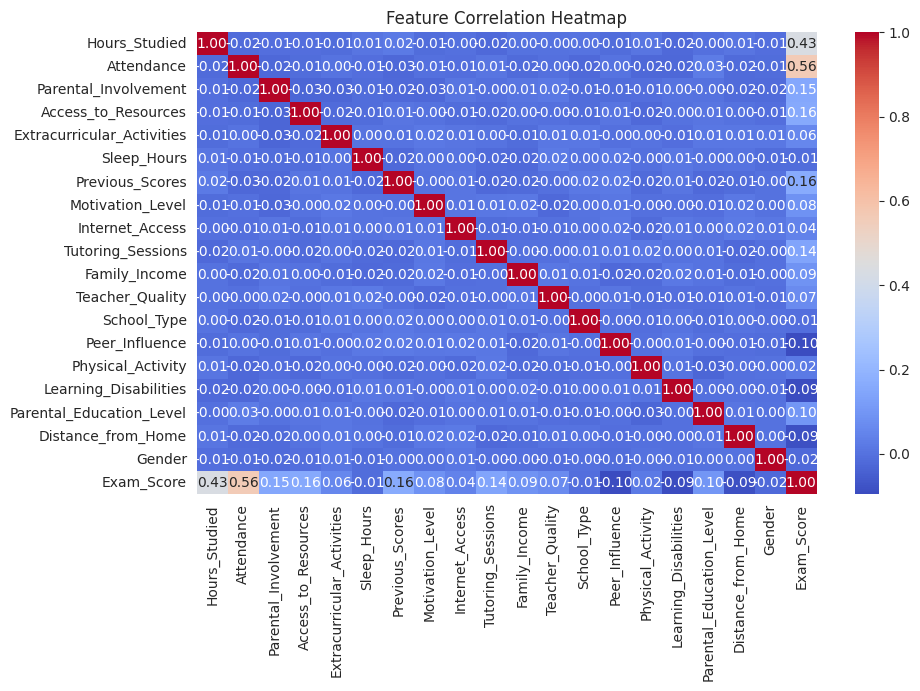

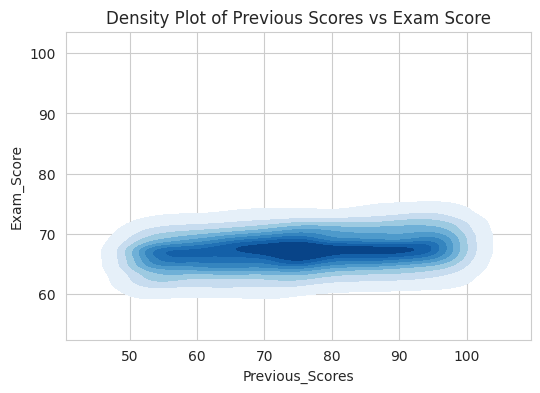

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 86.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 91.5% of the points cannot be plac

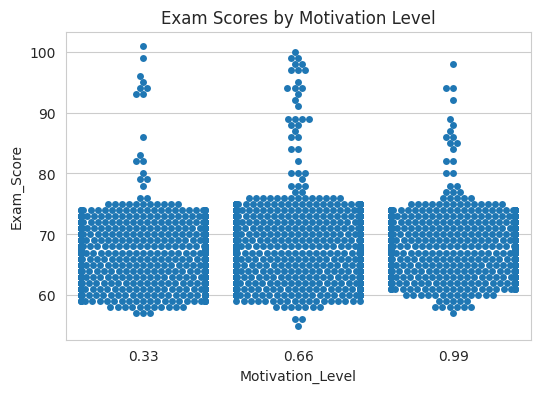

In [56]:
#AI suggestions for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame

# Set plot style
sns.set_style("whitegrid")

#Heatmap for Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#Density Plot for Continuous Variables (Previous Scores vs Exam Score)
plt.figure(figsize=(6, 4))
sns.kdeplot(x=df["Previous_Scores"], y=df["Exam_Score"], cmap="Blues", fill=True)
plt.title("Density Plot of Previous Scores vs Exam Score")
plt.show()

#Swarm Plot for Ordinal Data (Motivation Level)
plt.figure(figsize=(6, 4))
sns.swarmplot(x=df["Motivation_Level"], y=df["Exam_Score"])
plt.title("Exam Scores by Motivation Level")
plt.show()


R² Score: 0.7350852100022816
Mean Squared Error: 3.6967253088481526


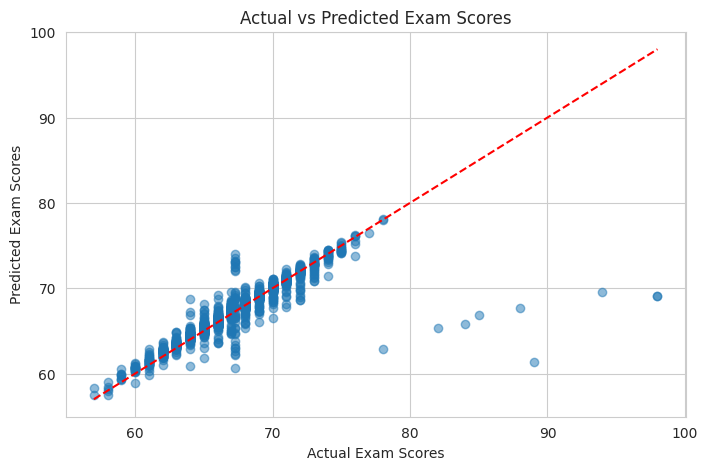

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Split into features (X) and target variable (y)
X = df_encoded.drop(columns=["Exam_Score"])
y = df_encoded["Exam_Score"]

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Show results
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Scatter plot: actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")  # Perfect fit line
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()


Mean Squared Error: 4.15
R² Score: 0.70


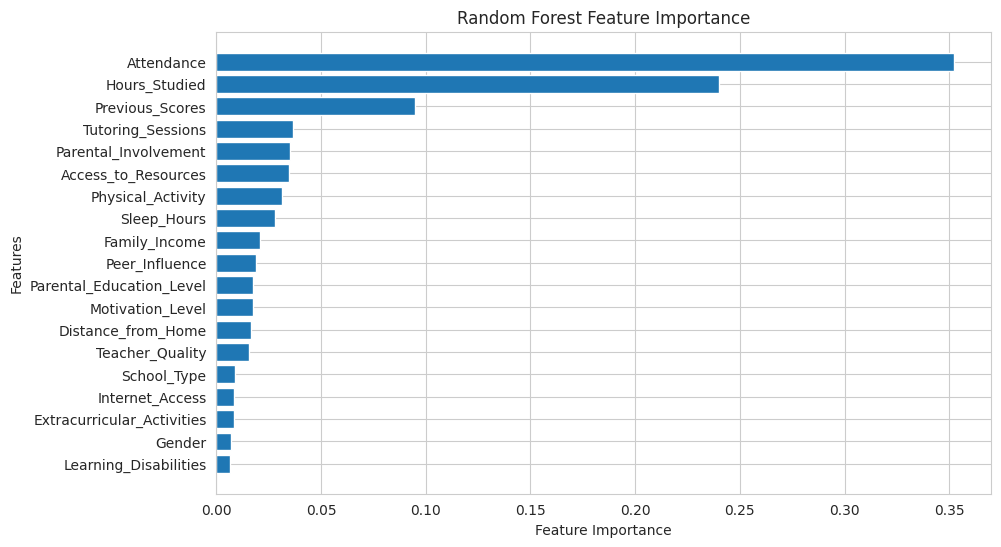

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Prepare Data
X = df.drop(columns=["Exam_Score"])  # Features
y = df["Exam_Score"]                 # Target Variable

# Split into Train and Test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 5: Feature Importance Visualization
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importance
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align="center")
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()
